<a href="https://colab.research.google.com/github/khairnarpv/khairnar/blob/main/Mcdonalds_food_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb



**Loading the dataset**

In [78]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds (2).csv


In [79]:
df = pd.read_csv(r"mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [38]:
# statistical info
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [80]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [81]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

,0
yummy,2
convenient,2
spicy,2
fattening,2
greasy,2
fast,2
cheap,2
tasty,2
expensive,2
healthy,2


**Preprocessing the dataset**

In [82]:
# check for null values
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [83]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

In [84]:
# check for numerical attributes
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int':
        num_col.append(x)
num_col

['Age']

In [85]:
# print the categorical columns value_counts
for col in cat_col:
    print(df[col].value_counts())
    print()

yummy
Yes    803
No     650
Name: count, dtype: int64

convenient
Yes    1319
No      134
Name: count, dtype: int64

spicy
No     1317
Yes     136
Name: count, dtype: int64

fattening
Yes    1260
No      193
Name: count, dtype: int64

greasy
Yes    765
No     688
Name: count, dtype: int64

fast
Yes    1308
No      145
Name: count, dtype: int64

cheap
Yes    870
No     583
Name: count, dtype: int64

tasty
Yes    936
No     517
Name: count, dtype: int64

expensive
No     933
Yes    520
Name: count, dtype: int64

healthy
No     1164
Yes     289
Name: count, dtype: int64

disgusting
No     1100
Yes     353
Name: count, dtype: int64

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a we

**Exploratory Data Analysis**

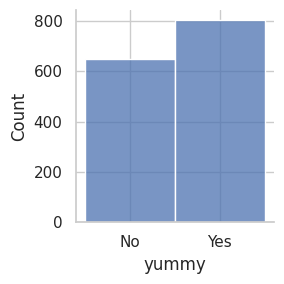

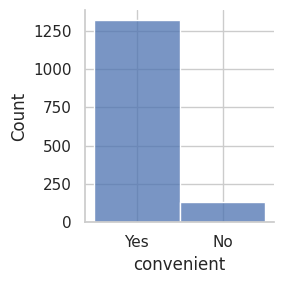

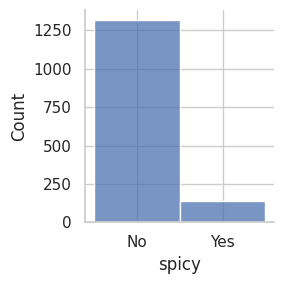

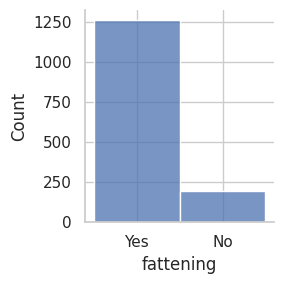

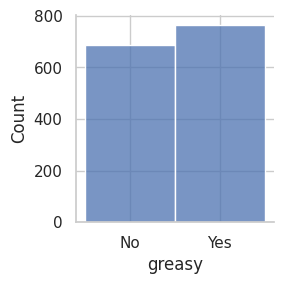

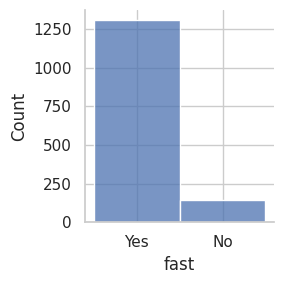

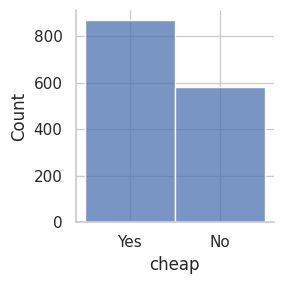

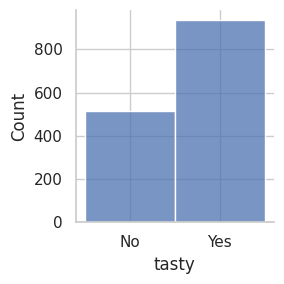

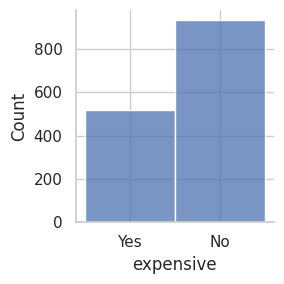

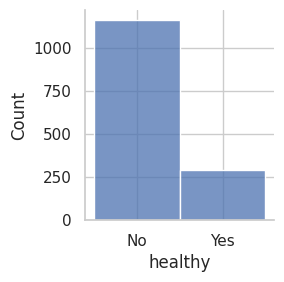

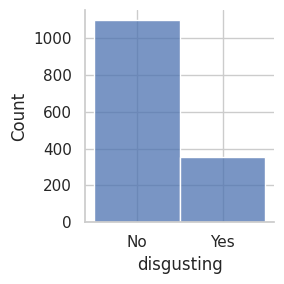

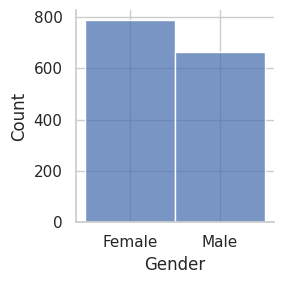

In [87]:
cat_col1 = ['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Gender']
for i in cat_col1:
    g = sns.displot(df[i], height=3, aspect=1)


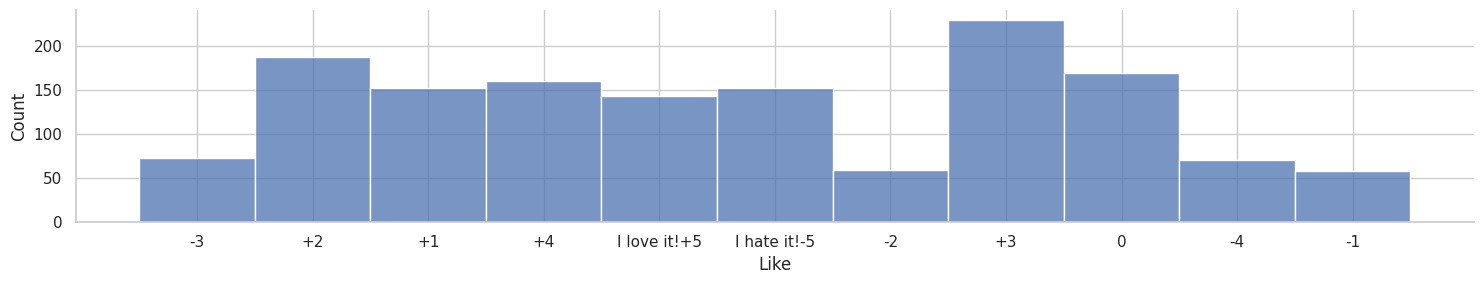

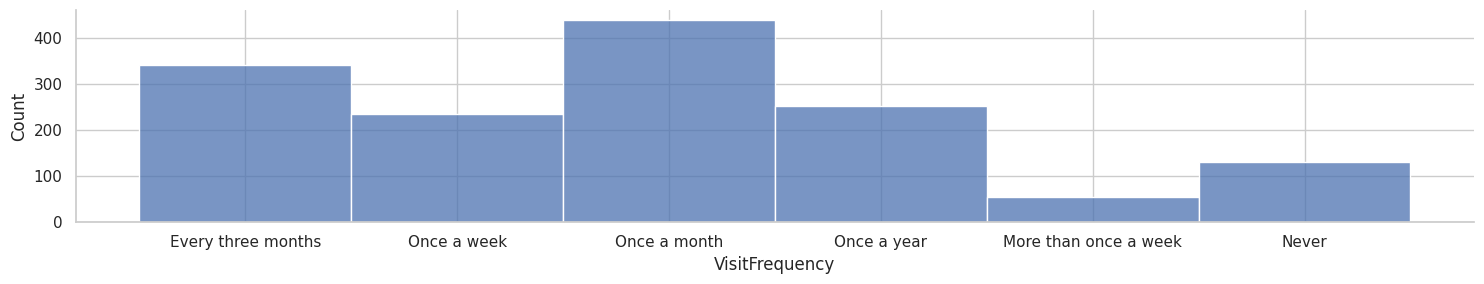

In [90]:
cat_col2 = ['Like','VisitFrequency']
for i in cat_col2:
    g = sns.displot(df[i], height=3, aspect=5)


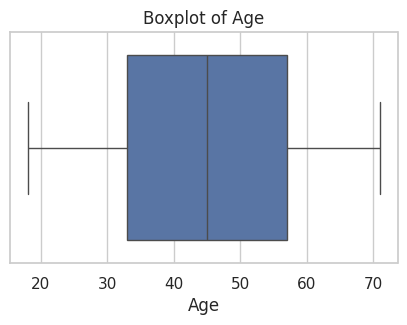

In [91]:
for col in num_col:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Feature Engineering**

In [92]:
yes_no_cat_col = []

for col in df.select_dtypes(include='object').columns:
  unique_vals = df[col].dropna().unique()  # dropna() to ignore NaNs
  if sorted(unique_vals) == ['No', 'Yes']:
        yes_no_cat_col.append(col)

print(yes_no_cat_col)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [93]:
df[yes_no_cat_col] = df[yes_no_cat_col].apply(lambda x: x.map({'No': 0, 'Yes': 1}))

In [94]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [95]:
# Function to extract numeric values from "Like" column
df["Like"] = df["Like"].str.extract(r'([-+]?\d+)').astype(int)

In [96]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,2,56,Every three months,Female
7,1,1,0,1,1,1,1,1,0,0,0,5,23,Once a week,Female
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,Once a year,Male
9,1,1,0,1,1,1,0,1,1,0,0,1,32,Every three months,Female


In [97]:
df['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [98]:
data= pd.DataFrame(df)

In [99]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


In [100]:
# Encoding Mapping
visit_mapping = {
    "Never": 0,
    "Once a year": 1,
    "Every three months": 2,
    "Once a month": 3,
    "Once a week": 4,
    "More than once a week": 5
}

# Apply Encoding on DataFrame Column
data["VisitFrequency"] = data["VisitFrequency"].map(visit_mapping)

In [101]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,Male


In [102]:
gender_mapping = {
    "Male": 0,
    "Female": 1
}

# Apply Encoding
data["Gender"] = data["Gender"].map(gender_mapping)

In [103]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,0


In [104]:
data.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,0.682827,-0.281653,0.509925,0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,0.365767,-0.070597,0.315363,0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,-0.009611,0.146217,-0.003903,-0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.160129,-0.139254,-0.112982,0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.257657,-0.233554,-0.180502,-0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,0.168519,-0.020558,0.070323,0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.146461,0.016958,0.087439,0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,0.644867,-0.194576,0.459538,0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.139637,-0.070851,-0.041474,-0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.280800,0.021366,0.188367,0.042455


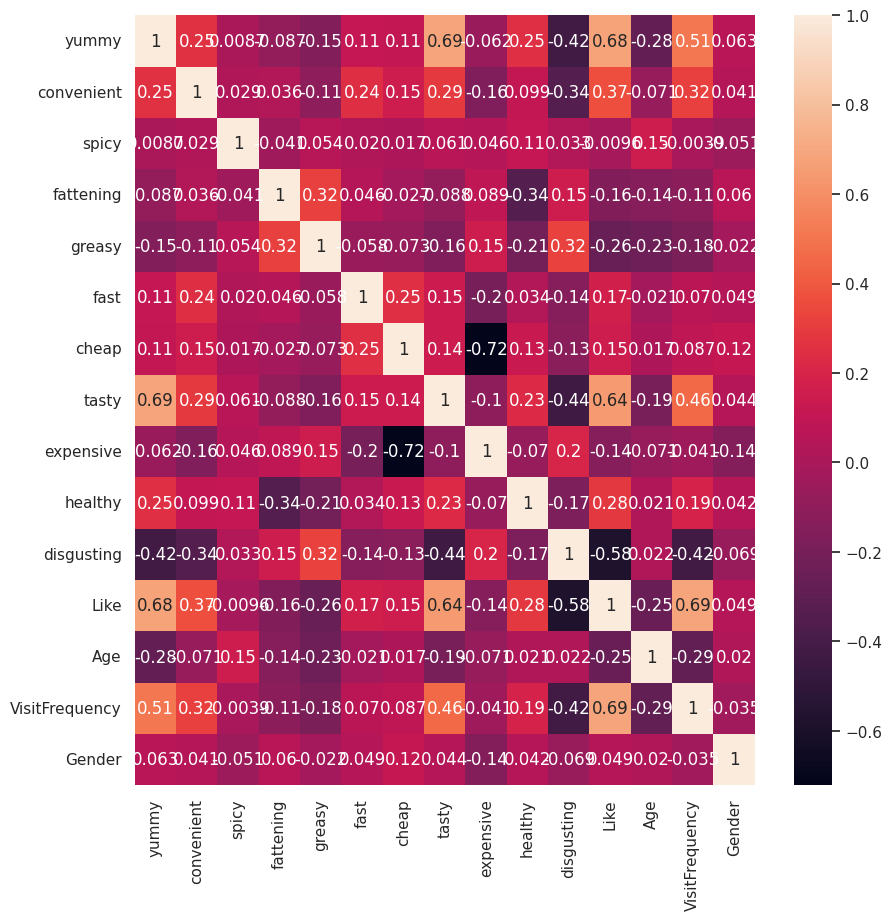

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

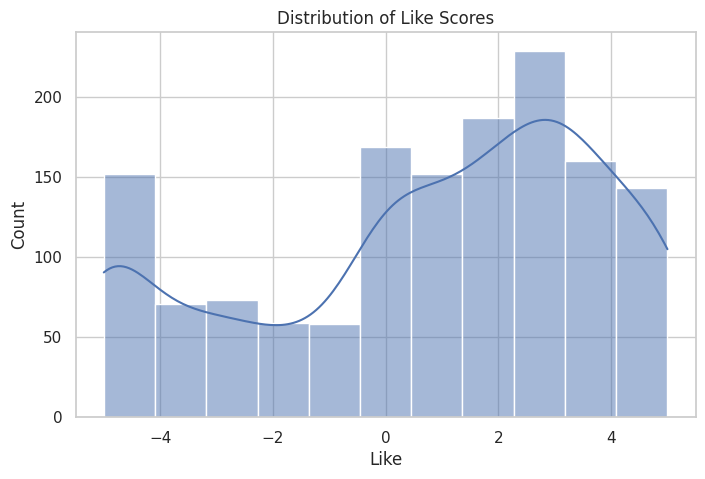

In [106]:
# Histogram of Like scores
plt.figure(figsize=(8, 5))
sns.histplot(data['Like'], bins=11, kde=True)
plt.title('Distribution of Like Scores')
plt.xlabel('Like')
plt.ylabel('Count')
plt.show()

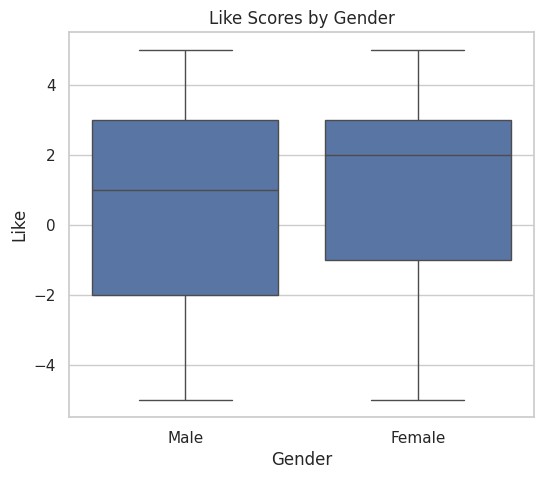

In [107]:
# Boxplot of Like by Gender
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='Like', data=data)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Like Scores by Gender')
plt.show()


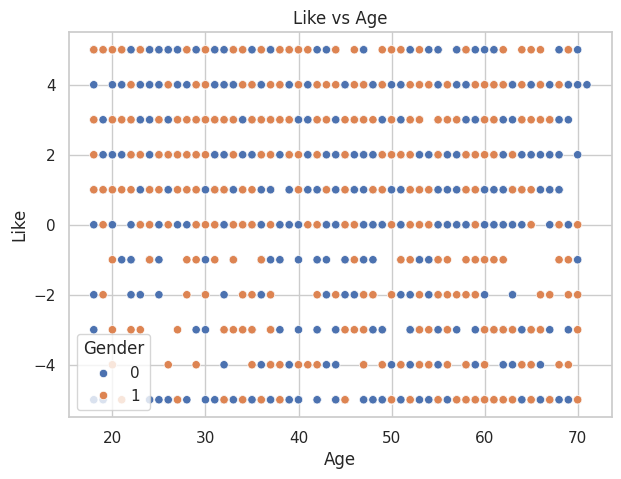

In [108]:
# Like vs Age scatter
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Like', hue='Gender', data=data)
plt.title('Like vs Age')
plt.show()

**Input Split**

In [109]:
# Features and target
X = data.drop(columns=["Like"])
y = data["Like"]

In [110]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Training**

In [112]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror")
}

In [113]:
metrics = []
# Train and evaluate models
for name, model in models.items():
    if name in ["Support Vector Regressor"]:  # SVR needs scaled input
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    #print(f"Model: {name}")
    #print(f"  R² Score: {r2:.4f}")
    #print(f"  MAE: {mae:.4f}")
    #print(f"  RMSE: {rmse:.4f}\n")

    metrics.append({
        "Model Name": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model Name  R2 Score       MAE      RMSE
0         Linear Regression  0.750597  1.301029  1.636763
1          Ridge Regression  0.750663  1.301339  1.636546
2          Lasso Regression  0.447835  1.998904  2.435395
3             Decision Tree  0.366965  1.929553  2.607648
4             Random Forest  0.700796  1.391666  1.792745
5         Gradient Boosting  0.750484  1.287230  1.637135
6  Support Vector Regressor  0.733956  1.309322  1.690486
7                   XGBoost  0.670157  1.484774  1.882299


In [114]:
from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameter grids
param_grids = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1.0]}
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {"max_depth": [3, 5, 10, None]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [50, 100], "max_depth": [5, 10, None]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}
    },
    "Support Vector Regressor": {
        "model": SVR(),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    },
    "XGBoost": {
        "model": xgb.XGBRegressor(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}
    }
}


In [115]:
# Run grid search
tuned_models = {}
best_scores = []

for name, config in param_grids.items():
    #print(f"Tuning {name}...")
    model = config["model"]
    params = config["params"]

    # Scale data for SVR
    X_train_input = X_train_scaled if name == "Support Vector Regressor" else X_train
    X_test_input = X_test_scaled if name == "Support Vector Regressor" else X_test

    grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train_input, y_train)

    best_model = grid.best_estimator_
    tuned_models[name] = best_model

    preds = best_model.predict(X_test_input)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    best_scores.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })



In [116]:
tuned_results_df = pd.DataFrame(best_scores)
print(tuned_results_df)

                      Model                                   Best Params  \
0         Linear Regression                                            {}   
1          Ridge Regression                               {'alpha': 10.0}   
2          Lasso Regression                               {'alpha': 0.01}   
3             Decision Tree                              {'max_depth': 5}   
4             Random Forest         {'max_depth': 5, 'n_estimators': 100}   
5         Gradient Boosting  {'learning_rate': 0.05, 'n_estimators': 100}   
6  Support Vector Regressor                {'C': 0.1, 'kernel': 'linear'}   
7                   XGBoost  {'learning_rate': 0.05, 'n_estimators': 100}   

   R2 Score       MAE      RMSE  
0  0.750597  1.301029  1.636763  
1  0.751043  1.304744  1.635298  
2  0.749621  1.307381  1.639964  
3  0.702750  1.366288  1.786884  
4  0.738152  1.303982  1.677104  
5  0.748914  1.298603  1.642275  
6  0.747405  1.269944  1.647205  
7  0.734927  1.302436  1.687401  


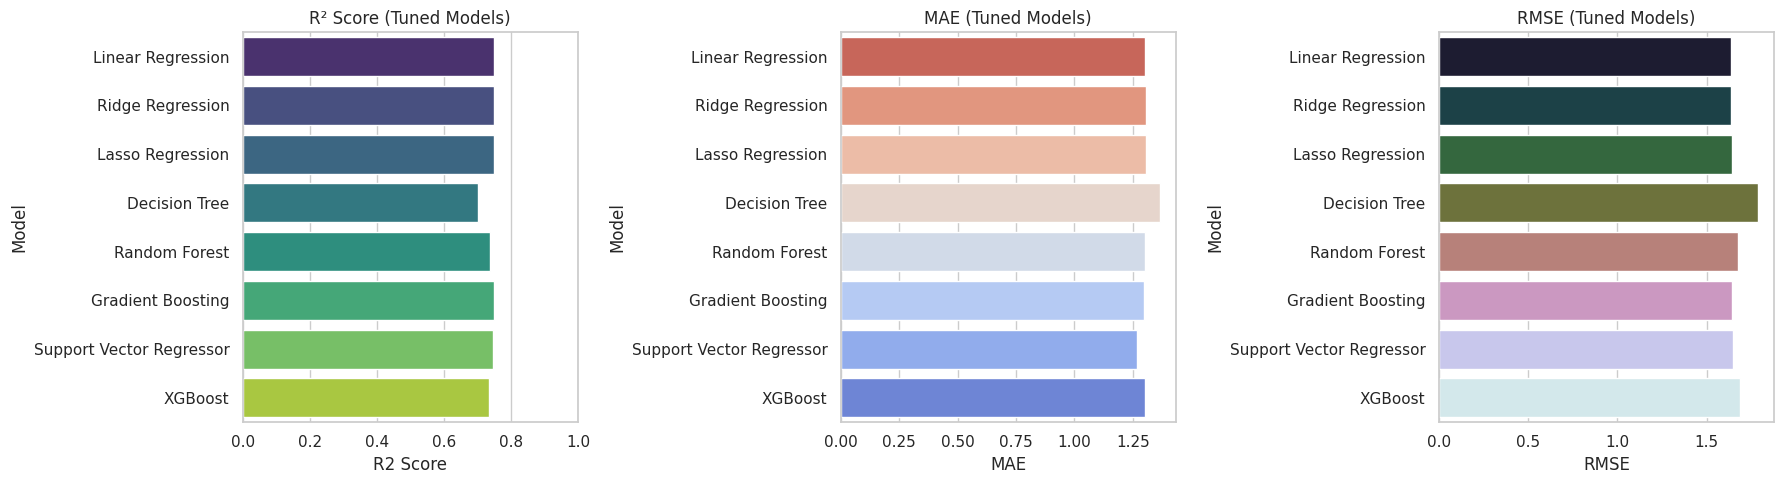

                      Model                                   Best Params
0         Linear Regression                                            {}
1          Ridge Regression                               {'alpha': 10.0}
2          Lasso Regression                               {'alpha': 0.01}
3             Decision Tree                              {'max_depth': 5}
4             Random Forest         {'max_depth': 5, 'n_estimators': 100}
5         Gradient Boosting  {'learning_rate': 0.05, 'n_estimators': 100}
6  Support Vector Regressor                {'C': 0.1, 'kernel': 'linear'}
7                   XGBoost  {'learning_rate': 0.05, 'n_estimators': 100}


In [117]:
plt.figure(figsize=(18, 5))

# R2 Score
plt.subplot(1, 3, 1)
sns.barplot(x="R2 Score", y="Model", data=tuned_results_df, palette="viridis")
plt.title("R² Score (Tuned Models)")
plt.xlim(0, 1)

# MAE
plt.subplot(1, 3, 2)
sns.barplot(x="MAE", y="Model", data=tuned_results_df, palette="coolwarm_r")
plt.title("MAE (Tuned Models)")

# RMSE
plt.subplot(1, 3, 3)
sns.barplot(x="RMSE", y="Model", data=tuned_results_df, palette="cubehelix")
plt.title("RMSE (Tuned Models)")

plt.tight_layout()
plt.show()

# View best hyperparameters
print(tuned_results_df[["Model", "Best Params"]])